In [2]:
import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

Expresión en Python: y+78*np.log(x)


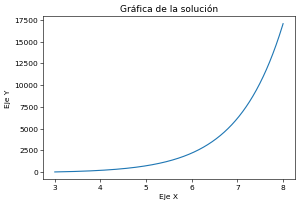

In [3]:
# botón para cambiar de entradas
def switch_focus(entries):         
    focused_entry = ventana.focus_get()      #te dice en qué estás enfocado
    if focused_entry in entries:
        focused_index = entries.index(focused_entry) #pregunta en qué numero de entrada estás
        next_index = (focused_index + 1) % len(entries) #te dice cual es la siguiente entrada
        entries[next_index].focus_set()     #te cambia a esa entrada

# función para escribir en las entradas
def click_boton(entries, valor):
    focused_entry = ventana.focus_get()    #pregunta en qué estas enfocado
    if focused_entry in entries:
        focused_index = entries.index(focused_entry) #te dice en qué número de entrada estas
        entries[focused_index].insert(tk.END, valor) #agrega el valor que puse a la entrada

# Crea la ventana principal
ventana = tk.Tk()
ventana.title("Teclado Virtual")


# Entrada para la ecuación a resolver
entrada1 = tk.Entry(ventana, width=50, font=('Arial', 14), bd=5, insertwidth=4)
entrada1.grid(row=0, column=0, columnspan=5)

# Entrada para añadir condición inicial
entrada4_label = tk.Label(ventana, text="Agrega una condición inicial en x0. Ejemplo: y(3)=10)") #etiqueta para decir al usuario que insertar
entrada4_label.grid(row=12, column=0, sticky=tk.W, columnspan=2)
entrada4 = tk.Entry(ventana, text="y0", width=50, font=('Arial', 14), bd=5, insertwidth=4) #crea entrada y la pone en la ventana
entrada4.grid(row=12, column=1, columnspan=5)

# Entrada para insertar la cantidad de pasos a usar en Runge Kutta
entrada3_label = tk.Label(ventana, text="Cuántos pasos deseas usar en Runge Kutta? Ejemplo: 300")
entrada3_label.grid(row=11, column=0, sticky=tk.W, columnspan=2)
entrada3 = tk.Entry(ventana, text="numero de pasos", width=50, font=('Arial', 14), bd=5, insertwidth=4)
entrada3.grid(row=11, column=1, columnspan=5)

#Entrada para insertar el intervalo a usar en Runge Kutta
entrada2_label = tk.Label(ventana, text="Determina el intervalo sin usar espacios. Ejemplo: (3,8)")
entrada2_label.grid(row=10, column=0, sticky=tk.W, columnspan=2)
entrada2 = tk.Entry(ventana, text="intervalo", width=50, font=('Arial', 14), bd=5, insertwidth=4)
entrada2.grid(row=10, column=1, columnspan=5)

# Define los botones a añadir a la ventana
botones = [
    '1', '2', '3', '4', '/',
    '5', '6', '7', '8', '*',
    '9', '0', '.', '+', '-',
    ',', '/', '(', ')', '^',
    'x', 'y', 'y\'', '=','e',
    'ln', 'sin', 'cos', 'tan'
]

# Crea los botones y los coloca en la ventana
fila, columna = 1, 0
for boton_texto in botones:
    tk.Button(ventana, text=boton_texto, width=20, height=2, command=lambda valor=boton_texto: click_boton([entrada1, entrada2, entrada3, entrada4], valor)).grid(row=fila, column=columna)
    columna += 1
    if columna > 4:
        columna = 0
        fila += 1
        

#Crea una función para borrar todo en una entrada
def clear_focused_entry():
    focused_entry = ventana.focus_get()
    if isinstance(focused_entry, tk.Entry):
        focused_entry.delete(0, tk.END)

# Botón para borrar todo en la entrada usando la función de arriba
tk.Button(ventana, text="Borrar entrada", width=20, height=2, command=lambda: clear_focused_entry()).grid(row=fila+1, column=1)

# Botón para traducir todo a pyhton como expresión matemática
def traducir_a_python():
    expresion = entrada1.get()
    expresion_python=expresion[3:]
    expresion_python = expresion_python.replace('^', '**')
    expresion_python = expresion_python.replace('e', 'np.exp(1)')
    expresion_python = expresion_python.replace('ln','np.log')
    expresion_python = expresion_python.replace('sin','np.sin')
    expresion_python = expresion_python.replace('cos','np.cos')
    expresion_python = expresion_python.replace('tan','np.tan')
    print("Expresión en Python:", expresion_python)
    return expresion_python


# Función para poder borrar solo una letra o número
def delete_last_character():
    focused_entry = ventana.focus_get()
    
    # Checar si se está enfocando en una entrada
    if isinstance(focused_entry, tk.Entry):
        current_text = focused_entry.get()
        new_text = current_text[:-1]  #Crea una variable sin la última letra o numero
        focused_entry.delete(0, tk.END) #Elimina todo lo que está en la entrada
        focused_entry.insert(0, new_text) #Escribe lo que se guardó en la última variable


#Botón para traducir a Python la primera entrada y lo coloca
#tk.Button(ventana, text="Traducir a Python", width=20, height=2, command=lambda: traducir_a_python()).grid(row=fila+1, column=3)

# Botón para cambiar de una entrada a otra en la ventana y lo coloca
tk.Button(ventana, text="Cambiar entrada", width=20, height=2, command=lambda: switch_focus([entrada1, entrada2, entrada3, entrada4])).grid(row=fila+1, column=2)

#Botón para borrar y lo coloca
tk.Button(ventana, text="Borrar último", width=20, height=2, command=lambda: delete_last_character()).grid(row=fila+1, column=0)

            
#Entrada para graficar la solución            
fig, ax = plt.subplots(figsize=(6, 4))    #crea una gráfica y define los ejes
canvas = FigureCanvasTkAgg(fig, master=ventana)    #avisa que se va a crear una entrada para poner la gráfica
canvas_widget = canvas.get_tk_widget() #pone la gráfica en la ventana
canvas_widget.grid(row=14, column=0, columnspan=5) #coloca la entrada en la ventana
canvas_widget.grid_remove()  # Hacer que no se vea al principio

          #################################################################################### Hasta aquí termina la funcionalidad del GUI 
            
        
#definimos el metodo de Runge Kutta
def RungeKutta(x0,X,y0,m,f):
    h=(X-x0)/m
    x=np.linspace(x0,X,m+1)
    y=np.zeros(m+1)
    y[0]=y0
    for j in range(m):
        k1=f(x[j],y[j])
        k2=f(x[j]+h/2,y[j]+h/2*k1)
        k3=f(x[j]+h/2,y[j]+h/2*k2)
        k4=f(x[j]+h,y[j]+h*k3)
        y[j+1]=y[j]+(h*(k1+2*k2+2*k3+k4))/6
    return x,y


#Crea una función que tome los parametros y resuelva la ecuación usando Runge Kutta
def resolver():
    intervalo = entrada2.get()   #le digo que agarre lo que se escribió en el intervalo
    intervalo = intervalo.replace("(", "").replace(")", "").replace(" ", "")  # Quita parentesis y espacios
    lista = intervalo.split(",")   #Separa en una lista 
    listaB=[float(lista[0]), float(lista[1])] #Crea una segunda lista con los valores iniciales y finales de los parametros
    cond_inicial=entrada4.get()        #le digo que agarre lo que se escribií en la condición inicial
    lista2=cond_inicial.split("=")      #le digo que separe en dos listas con el simbolo =
    x0=float(listaB[0]) #inicio intervalo
    X=float(listaB[1]) #final intervalo
    y0=float(lista2[1]) #condicion inicial
    m=int(entrada3.get()) #cantidad de pasos a usar en Runge Kutta
    x=np.linspace(x0,X,m+1) #creo un linspace para usar en Runge Kutta
    y=np.zeros(m+1) #creo la matriz de resultados en cada paso
    f0 = traducir_a_python() #convierto la expresión de la entrada uno a expresión matemática
    f = lambda x, y: eval(f0) #creo la función como lamba y le digo que evalue
    x,y=RungeKutta(x0,X,y0,m,f) #Uso Runge Kutta
    ax.clear() #le digo que borre la gráfica anterior
    ax.plot(x, y) #le digo que grafique la nueva gráfica
    ax.set_xlabel('Eje X') #poner nombre a ejes
    ax.set_ylabel('Eje Y')
    ax.set_title('Gráfica de la solución')
    canvas.draw() #le digo que dibuje en el canvas que había creado
    canvas_widget.grid() #le digo que muestre el canvas
           
tk.Button(ventana, text="Resolver", width=40, height=2, command=lambda: resolver()).grid(row=13, column=1, columnspan=5) #creo un botón para que se corra la función resolver
entrada1.focus_set() #Le digo que se enfoque en la primera entrada de la ventana

#Corre todo lo de arriba
ventana.mainloop()